In [1]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import config as config

# Connecting SQL database
conn_string = f'postgresql://{config.user}:{config.password}@{config.host}:{config.port}/{config.database}'
engine = create_engine(conn_string)
connection = engine.connect()




In [2]:
# Reading "Salaries" sql table 
salaries= pd.read_sql_table('salaries',connection)
salaries_df= salaries.rename(columns= {"emp_id":"id"})
salaries_df.count()

id        300024
salary    300024
dtype: int64

In [3]:
# verifying nulls
nulls= salaries_df.loc[salaries_df['salary'].isnull()]
nulls

,id,salary


In [4]:
# Max, Min and avg salaries

max_salary= max(salaries['salary'])
min_salary= min(salaries['salary'])
mean_salary= round(np.mean(salaries['salary']),2)
print (f'The maximum salaries is {max_salary} and the minimum salarie is {min_salary}')
print(f'Average salarie is around {mean_salary}')

The maximum salaries is 129492 and the minimum salarie is 40000
Average salarie is around 52970.73


Text(0, 0.5, 'Frecuency')

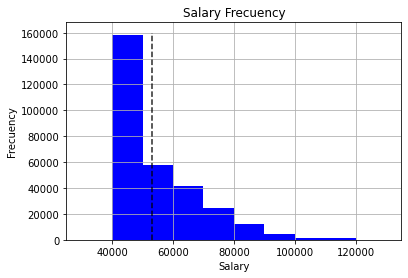

In [5]:
#Generaring a histogram to visualize salary's frecuency and the mean
bins_list= [30000,40000,50000,60000,70000,80000,90000,100000,120000,130000]
salaries.salary.hist(bins=bins_list,color='b')
plt.title ("Salary Frecuency")
plt.vlines(mean_salary,0,160000, alpha= 0.85,linestyles='dashed', color= 'k', label= "Mean")
plt.xlabel("Salary")
plt.ylabel("Frecuency")

In [6]:
def select_pandas_table(sql_query, database = connection):
    table = pd.read_sql_query(sql_query, database)
    return table 
# Utilize the create_pandas_table function to create a Pandas data frame
# Store the data as a variable
salary_df2 = select_pandas_table("SELECT titles.title, round(AVG(salaries.salary),2) FROM salaries JOIN employees ON salaries.emp_id = employees.id JOIN titles ON titles.id = employees.title_id GROUP BY titles.title")
salary_renamed = salary_df2.rename(columns= {"title":"Job Title","round":"Salary Avg"})
salary_avg= salary_renamed.set_index("Job Title")
salary_avg_df= salary_avg.sort_values("Salary Avg")
salary_avg_df

,Salary Avg
Job Title,
Senior Engineer,48506.80
Engineer,48535.34
Assistant Engineer,48564.43
Technique Leader,48582.90
Manager,51531.04
Staff,58465.38
Senior Staff,58550.17


Text(0.5, 1.0, 'Average Salary Per Job Title')

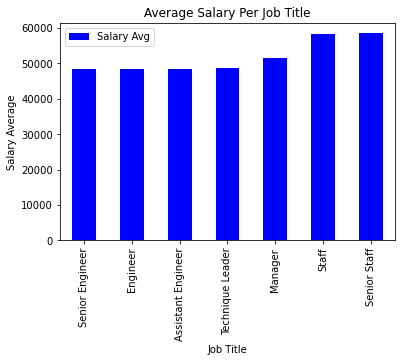

In [15]:
# Generating bar plot
salary_avg_df.plot(kind="bar", color= "b")
plt.ylabel("Salary Average")
plt.title("Average Salary Per Job Title")

#### We can also read individual tables from SQL, and then use pandas functions to transform the data

In [8]:
#Reading table Titles
title= pd.read_sql_table('titles',connection)
titles_df= title.rename(columns= {"id":"title_id"})
titles_df

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [9]:
#Reading Table Employees
employee= pd.read_sql_table('employees', connection)
employee

,id,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [10]:
# Merging Tables
salaries_employees= pd.merge(salaries_df,employee,on="id")
salaries_employees_title= pd.merge(salaries_employees,titles_df, on="title_id")
salaries_employees_title

,id,salary,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,Senior Engineer
...,...,...,...,...,...,...,...,...,...
300019,111534,48077,m0001,1952-06-27,Hilary,Kambil,F,1988-01-31,Manager
300020,111692,40000,m0001,1954-10-05,Tonny,Butterworth,F,1985-01-01,Manager
300021,111784,40000,m0001,1956-06-14,Marjo,Giarratana,F,1988-02-12,Manager
300022,111877,53846,m0001,1962-10-18,Xiaobin,Spinelli,F,1991-08-17,Manager


In [11]:
# Cheking null values
salaries_employees_title.replace("",np.nan,inplace=True)
salaries_employees_title.dropna()

,id,salary,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,Senior Engineer
...,...,...,...,...,...,...,...,...,...
300019,111534,48077,m0001,1952-06-27,Hilary,Kambil,F,1988-01-31,Manager
300020,111692,40000,m0001,1954-10-05,Tonny,Butterworth,F,1985-01-01,Manager
300021,111784,40000,m0001,1956-06-14,Marjo,Giarratana,F,1988-02-12,Manager
300022,111877,53846,m0001,1962-10-18,Xiaobin,Spinelli,F,1991-08-17,Manager


In [12]:
# Filtering the DF
final_df= salaries_employees_title[["id","title","salary"]]
final_df

,id,title,salary
0,10001,Senior Engineer,60117
1,10003,Senior Engineer,40006
2,10004,Senior Engineer,40054
3,10006,Senior Engineer,40000
4,10009,Senior Engineer,60929
...,...,...,...
300019,111534,Manager,48077
300020,111692,Manager,40000
300021,111784,Manager,40000
300022,111877,Manager,53846


In [13]:
# Grouping by Title and sorting by average salary
grouped_final_df = final_df.groupby("title")
agg_salary_df = grouped_final_df.agg(Avg_Salary = pd.NamedAgg(column = "salary", aggfunc = "mean"))
salaries_df2= agg_salary_df.sort_values("Avg_Salary")

Text(0.5, 1.0, 'Salary Average VS Job Title')

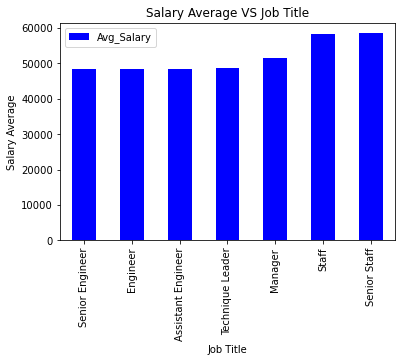

In [14]:
# Generating a bar plot
salaries_df2.plot(kind="bar",color="b")
plt.ylabel("Salary Average")
plt.xlabel("Job Title")
plt.title("Salary Average VS Job Title")